In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

In [2]:
demographic = pd.read_csv("../Modified_data/demographic_refined.csv")
demographic

,zipcode,county_name,city,population,population_rank,city_name,aland,median_household_income,average_household_income,per_capita_income,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
0,90242,Los Angeles,Downey,112322,59,Downey,11788002,71233,85792,26335,...,738,42694,9384.0,34.1,0.1440,0.06500,0.07600,0.05700,12713,513900
1,90747,Los Angeles,Carson,92079,83,Carson,16629,72803,91209,28026,...,704,33215,4884.0,39.7,0.1885,0.07477,0.08100,0.06430,9331,464175
2,91501,Los Angeles,Burbank,103703,71,Burbank; Glendale,10275284,67817,94589,38247,...,965,20511,5170.0,40.5,0.2810,0.14800,0.09705,0.08100,8417,770500
3,92115,San Diego,San Diego,1409573,2,San Diego,16845692,51636,73784,25970,...,1130,64343,9896.0,28.3,0.2020,0.12396,0.11400,0.06500,23089,499100
4,92543,Riverside,Hemet,84542,100,East Hemet; Hemet,45646461,33319,45497,16435,...,160,38314,2174.0,35.2,0.0570,0.02301,0.23790,0.15000,14367,136600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,90042,Los Angeles,Los Angeles,3966936,1,Los Angeles,12036777,64267,87211,30575,...,1641,63193,13600.0,35.8,0.2130,0.11000,0.11300,0.06800,22061,627200
970,90043,Los Angeles,Los Angeles,3966936,1,Los Angeles; View Park-Windsor Hills,10705825,54729,77169,31101,...,1236,45873,11096.0,40.1,0.1600,0.10205,0.14210,0.09000,18748,556400
971,90044,Los Angeles,Los Angeles,3966936,1,Los Angeles; West Athens; Westmont,13303667,35981,51524,16278,...,474,99443,19360.0,31.6,0.0590,0.02000,0.26200,0.07104,30461,391100
972,90045,Los Angeles,Los Angeles,3966936,1,Del Aire; Los Angeles,27794039,104578,140825,56291,...,3432,40567,3780.0,35.1,0.3830,0.22500,0.04602,0.05000,17133,959400


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

##demo_real = demographic.select_dtypes(include=numerics)
demo_real = demographic[['median_household_income', 'average_household_income']]
demo_real

,median_household_income,average_household_income
0,71233,85792
1,72803,91209
2,67817,94589
3,51636,73784
4,33319,45497
...,...,...
969,64267,87211
970,54729,77169
971,35981,51524
972,104578,140825


In [4]:
kmeans = cluster.KMeans(n_clusters=5)
clabels = kmeans.fit_predict(demo_real) 
demo_real['kmeans_label'] = clabels 
demo_real

<ipython-input-4-1dca25ca363a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_real['kmeans_label'] = clabels


,median_household_income,average_household_income,kmeans_label
0,71233,85792,2
1,72803,91209,2
2,67817,94589,2
3,51636,73784,3
4,33319,45497,3
...,...,...,...
969,64267,87211,2
970,54729,77169,3
971,35981,51524,3
972,104578,140825,0


In [5]:
##demographic['kmeans_label'] = demo_real['kmeans_label']
demographic.insert(7, 'kmeans_label', demo_real['kmeans_label'])
demographic

,zipcode,county_name,city,population,population_rank,city_name,aland,kmeans_label,median_household_income,average_household_income,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
0,90242,Los Angeles,Downey,112322,59,Downey,11788002,2,71233,85792,...,738,42694,9384.0,34.1,0.1440,0.06500,0.07600,0.05700,12713,513900
1,90747,Los Angeles,Carson,92079,83,Carson,16629,2,72803,91209,...,704,33215,4884.0,39.7,0.1885,0.07477,0.08100,0.06430,9331,464175
2,91501,Los Angeles,Burbank,103703,71,Burbank; Glendale,10275284,2,67817,94589,...,965,20511,5170.0,40.5,0.2810,0.14800,0.09705,0.08100,8417,770500
3,92115,San Diego,San Diego,1409573,2,San Diego,16845692,3,51636,73784,...,1130,64343,9896.0,28.3,0.2020,0.12396,0.11400,0.06500,23089,499100
4,92543,Riverside,Hemet,84542,100,East Hemet; Hemet,45646461,3,33319,45497,...,160,38314,2174.0,35.2,0.0570,0.02301,0.23790,0.15000,14367,136600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,90042,Los Angeles,Los Angeles,3966936,1,Los Angeles,12036777,2,64267,87211,...,1641,63193,13600.0,35.8,0.2130,0.11000,0.11300,0.06800,22061,627200
970,90043,Los Angeles,Los Angeles,3966936,1,Los Angeles; View Park-Windsor Hills,10705825,3,54729,77169,...,1236,45873,11096.0,40.1,0.1600,0.10205,0.14210,0.09000,18748,556400
971,90044,Los Angeles,Los Angeles,3966936,1,Los Angeles; West Athens; Westmont,13303667,3,35981,51524,...,474,99443,19360.0,31.6,0.0590,0.02000,0.26200,0.07104,30461,391100
972,90045,Los Angeles,Los Angeles,3966936,1,Del Aire; Los Angeles,27794039,0,104578,140825,...,3432,40567,3780.0,35.1,0.3830,0.22500,0.04602,0.05000,17133,959400


In [6]:
demographic.to_csv('../demographic_cluster_testing.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


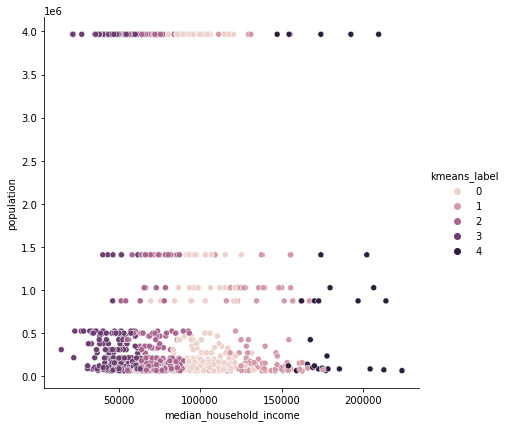

In [7]:
sns.pairplot(x_vars=['median_household_income'], y_vars=['population'], data=demographic, hue="kmeans_label", size=6)